In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
data = pd.read_parquet("dataset_log_returns(mid_price).pq")
data_vol = pd.read_parquet("dataset_log_returns(volWeighted_mid_price).pq")
data_ewm = pd.read_parquet("dataset_log_returns(mid_price)_EWM5.pq")


data_vol['class'] = (data_vol['log_returns(volWeighted_mid_price)'] != 0).astype(int)
data_ewm['class'] = (data_ewm['log_returns(mid_price)_EWM5'] != 0).astype(int)


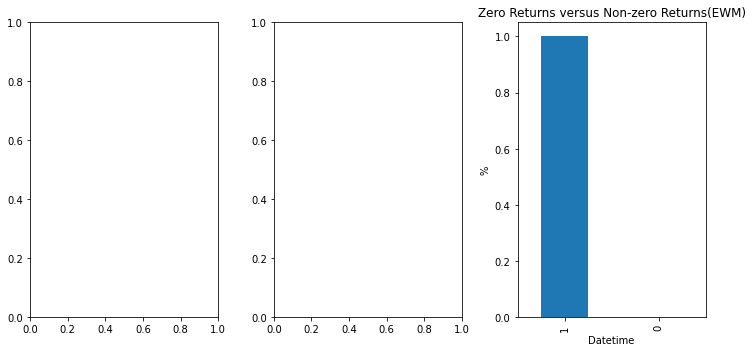

In [25]:
fig, axs = plt.subplots(1,3, figsize=(10,5))

data['class'].value_counts(normalize=True).plot.bar(axs[0])
plt.title('Zero Returns versus Non-zero Returns(mid)')
plt.xlabel('Datetime')
plt.ylabel('%')

data_vol['class'].value_counts(normalize=True).plot.bar(axs[1])
plt.title('Zero Returns versus Non-zero Returns(Vol)')
plt.xlabel('Datetime')
plt.ylabel('%')

data_ewm['class'].value_counts(normalize=True).plot.bar(axs[2])
plt.title('Zero Returns versus Non-zero Returns(EWM)')
plt.xlabel('Datetime')
plt.ylabel('%')

plt.tight_layout()
plt.show()

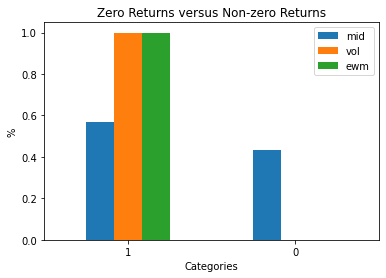

In [41]:
mid = list(data['class'].value_counts(normalize=True))
vol = list(data_vol['class'].value_counts(normalize=True))
ewm = list(data_ewm['class'].value_counts(normalize=True))
index = ['1', '0']

df = pd.DataFrame({'mid': mid,
                   'vol': vol,
                   'ewm': vol}, index=index)
ax = df.plot.bar(rot=0)
plt.title('Zero Returns versus Non-zero Returns')
plt.ylabel('%')
plt.xlabel('Categories')
plt.show()

<AxesSubplot:>

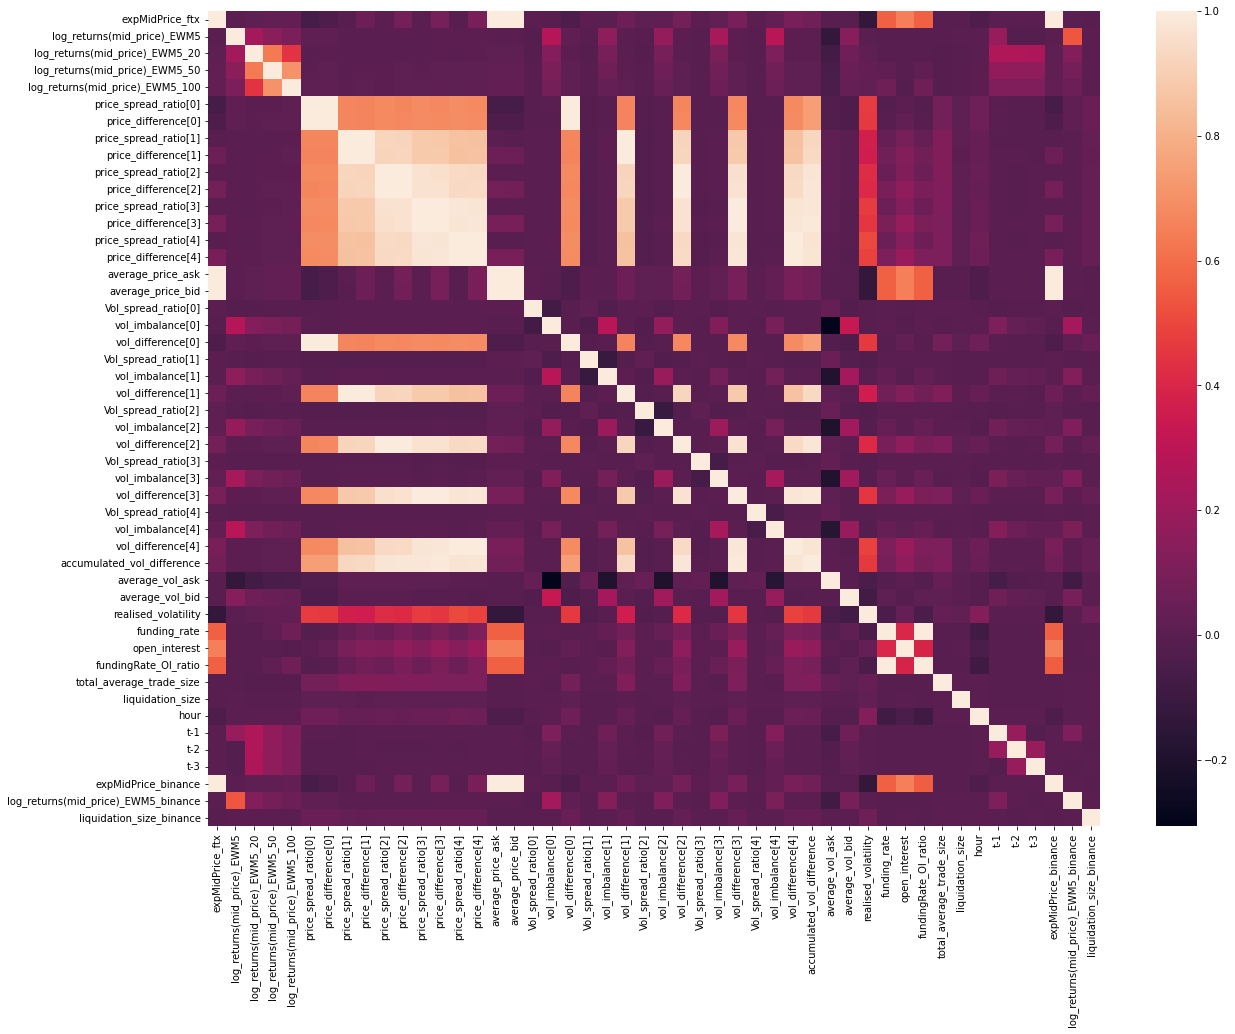

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data_ewm.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr)

In [152]:
data.corr()

,mid_price,log_returns(mid_price),class,log_returns(mid_price)_20,log_returns(mid_price)_50,log_returns(mid_price)_100,price_spread_ratio[0],price_difference[0],price_spread_ratio[1],price_difference[1],...,fundingRate_OI_ratio,total_average_trade_size,liquidation_size,hour,t-1,t-2,t-3,mid_price_binance,log_returns(mid_price)_binance,liquidation_size_binance
mid_price,1.000000,0.002250,-0.087057,0.013367,0.021781,0.031402,-0.056893,-0.031873,0.000022,0.052874,...,0.565778,-0.006160,-0.007549,-0.037084,0.003995,0.003948,0.003926,0.999892,0.002426,-0.008514
log_returns(mid_price),0.002250,1.000000,-0.001892,0.041753,0.032965,0.017905,0.015796,0.016465,0.001068,0.001605,...,-0.002159,-0.058599,0.003063,0.001209,0.016974,-0.009933,-0.004663,-0.000899,0.339079,0.004235
class,-0.087057,-0.001892,1.000000,0.005725,0.004391,0.005578,0.225724,0.224930,0.071242,0.066548,...,-0.040805,0.010649,0.011316,0.073236,0.000163,0.001785,0.002789,-0.087203,-0.000740,0.023442
log_returns(mid_price)_20,0.013367,0.041753,0.005725,1.000000,0.643899,0.445512,0.003859,0.006880,-0.001903,0.001400,...,-0.004429,-0.016697,-0.005621,0.003449,0.281905,0.284380,0.282068,0.013200,0.102264,0.005104
log_returns(mid_price)_50,0.021781,0.032965,0.004391,0.643899,1.000000,0.712070,0.009240,0.012642,0.003438,0.007258,...,0.017752,-0.013225,-0.005286,0.006129,0.184661,0.186340,0.184810,0.021370,0.067699,0.005510
log_returns(mid_price)_100,0.031402,0.017905,0.005578,0.445512,0.712070,1.000000,0.014392,0.018119,0.007490,0.011746,...,0.062858,-0.012398,-0.003783,0.008624,0.125616,0.127012,0.125931,0.030674,0.044314,0.001981
price_spread_ratio[0],-0.056893,0.015796,0.225724,0.003859,0.009240,0.014392,1.000000,0.999390,0.685565,0.680910,...,-0.018090,0.077847,0.013907,0.065845,0.012233,-0.003217,-0.006540,-0.057011,0.015492,0.046505
price_difference[0],-0.031873,0.016465,0.224930,0.006880,0.012642,0.018119,0.999390,1.000000,0.685381,0.682459,...,-0.003203,0.077383,0.013645,0.065093,0.013318,-0.002016,-0.005502,-0.031992,0.016057,0.046503
price_spread_ratio[1],0.000022,0.001068,0.071242,-0.001903,0.003438,0.007490,0.685565,0.685381,1.000000,0.998284,...,0.037369,0.123976,0.009809,0.043977,-0.000128,0.000670,-0.003601,-0.000241,0.002889,0.030749
price_difference[1],0.052874,0.001605,0.066548,0.001400,0.007258,0.011746,0.680910,0.682459,0.998284,1.000000,...,0.067653,0.121372,0.009392,0.042452,0.001191,0.001715,-0.002552,0.052600,0.003549,0.030289


In [73]:
(data['class']==1).sum()/len(data)

0.5663535139747526

Text(0, 0.5, '%')

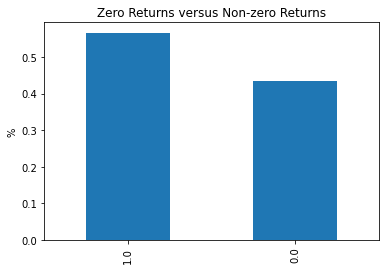

In [139]:
data['class'].value_counts(normalize=True).plot.bar(axs[0,1])
plt.title('Zero Returns versus Non-zero Returns')
plt.ylabel('%')

In [140]:
data_ewm.head()

,expMidPrice_ftx,log_returns(mid_price)_EWM5,log_returns(mid_price)_EWM5_20,log_returns(mid_price)_EWM5_50,log_returns(mid_price)_EWM5_100,price_spread_ratio[0],price_difference[0],price_spread_ratio[1],price_difference[1],price_spread_ratio[2],...,fundingRate_OI_ratio,total_average_trade_size,liquidation_size,hour,t-1,t-2,t-3,expMidPrice_binance,log_returns(mid_price)_EWM5_binance,liquidation_size_binance
2021-12-11 11:49:36,48302.034659,0.000045,-0.000022,-0.000015,4.523627e-06,1.000023,1.125000,1.000105,5.083333,1.000166,...,2.618296e-10,995.0624,0.0,11.0,-0.000074,0.000004,0.000034,48260.0,2.220446e-16,0.0
2021-12-11 11:49:37,48300.062917,-0.000031,-0.000025,-0.000016,4.072618e-06,1.000021,1.000000,1.000104,5.000000,1.000198,...,2.618296e-10,0.0000,0.0,11.0,0.000045,-0.000074,0.000004,48260.0,-1.110223e-16,0.0
2021-12-11 11:49:38,48296.533768,-0.000041,-0.000023,-0.000016,2.865618e-06,1.000038,1.818182,1.000111,5.363636,1.000164,...,2.618296e-10,257869.3788,0.0,11.0,-0.000031,0.000045,-0.000074,48260.0,0.000000e+00,0.0
2021-12-11 11:49:39,48298.755442,-0.000073,-0.000029,-0.000018,8.593479e-08,1.000025,1.206897,1.000111,5.379310,1.000172,...,2.618296e-10,96.5900,0.0,11.0,-0.000041,-0.000031,0.000045,48260.0,2.220446e-16,0.0
2021-12-11 11:49:40,48299.725090,0.000046,-0.000026,-0.000016,2.274316e-07,1.000021,1.000000,1.000143,6.928571,1.000185,...,2.618296e-10,0.0000,0.0,11.0,-0.000073,-0.000041,-0.000031,48260.0,0.000000e+00,0.0


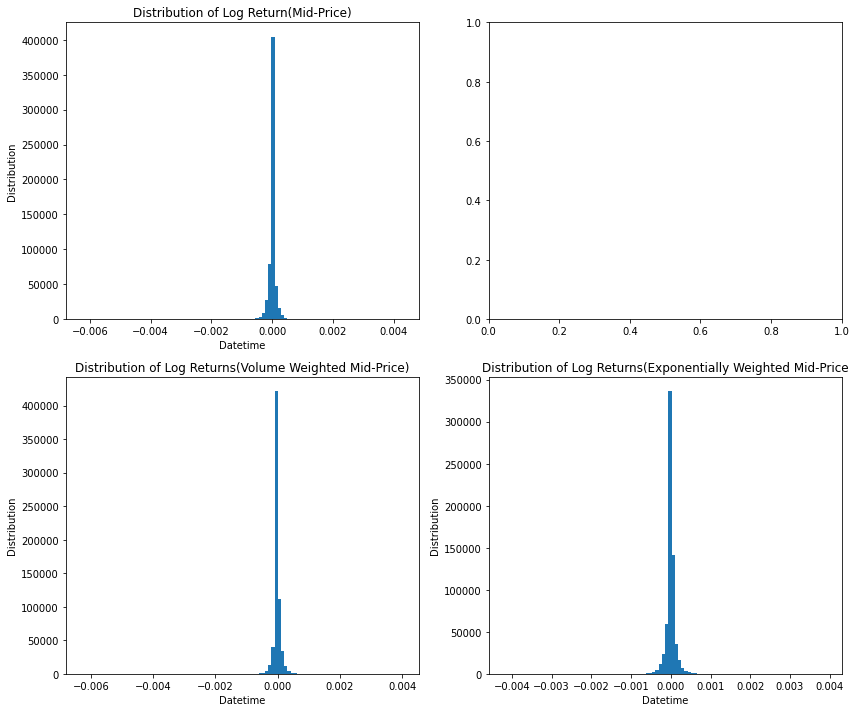

In [144]:
fig, axs = plt.subplots(2,2, figsize=(12, 10))
axs[0,0].hist(data['log_returns(mid_price)'], bins=100)
axs[0,0].title.set_text('Distribution of Log Return(Mid-Price)')
axs[0,0].set_xlabel('Datetime')
axs[0,0].set_ylabel('Distribution')

axs[1,0].hist(data_vol['log_returns(volWeighted_mid_price)'], bins=100)
axs[1,0].title.set_text('Distribution of Log Returns(Volume Weighted Mid-Price)')
axs[1,0].set_xlabel('Datetime')
axs[1,0].set_ylabel('Distribution')

axs[1,1].hist(data_ewm['log_returns(mid_price)_EWM5'], bins=100)
axs[1,1].title.set_text('Distribution of Log Returns(Exponentially Weighted Mid-Price')
axs[1,1].set_xlabel('Datetime')
axs[1,1].set_ylabel('Distribution')



fig.tight_layout()


- Moving Average plot

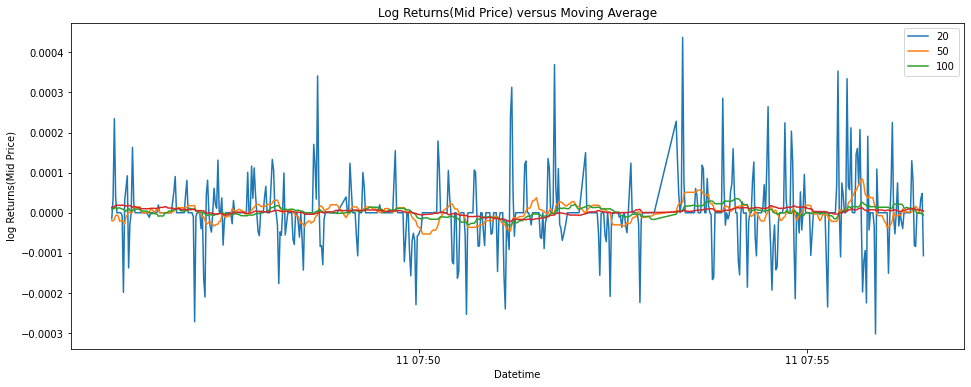

In [127]:
data = pd.read_parquet("dataset_log_returns(mid_price).pq")
data = data[:int(len(data)*(1/1000))]
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(data['log_returns(mid_price)'])
ax.plot(data['log_returns(mid_price)_20'])
ax.plot(data['log_returns(mid_price)_50'])
ax.plot(data['log_returns(mid_price)_100'])
ax.legend(['20', '50', '100'])
plt.title('Log Returns(Mid Price) versus Moving Average')
plt.xlabel('Datetime')
plt.ylabel('log Returns(Mid Price)')
plt.show()

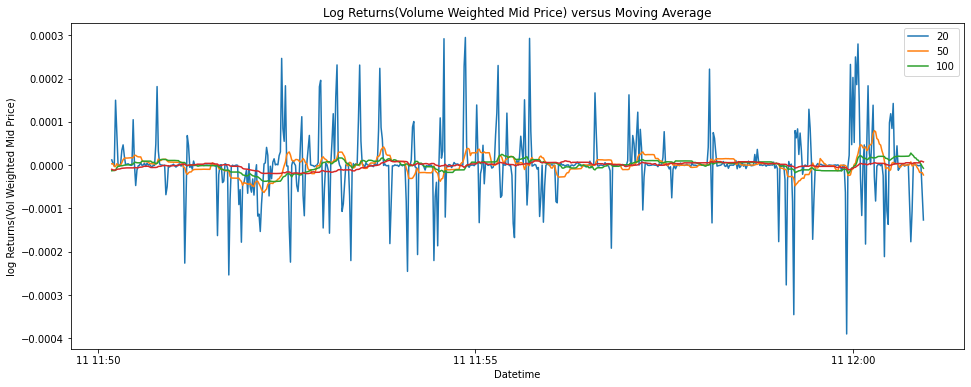

In [126]:
data = pd.read_parquet("dataset_log_returns(volWeighted_mid_price).pq")
data = data[:int(len(data)*(1/1000))]
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(data['log_returns(volWeighted_mid_price)'])
ax.plot(data['log_returns(volWeighted_mid_price)_20'])
ax.plot(data['log_returns(volWeighted_mid_price)_50'])
ax.plot(data['log_returns(volWeighted_mid_price)_100'])
ax.legend(['20', '50', '100'])
plt.title('Log Returns(Volume Weighted Mid Price) versus Moving Average')
plt.xlabel('Datetime')
plt.ylabel('log Returns(Vol Weighted Mid Price)')
plt.show()

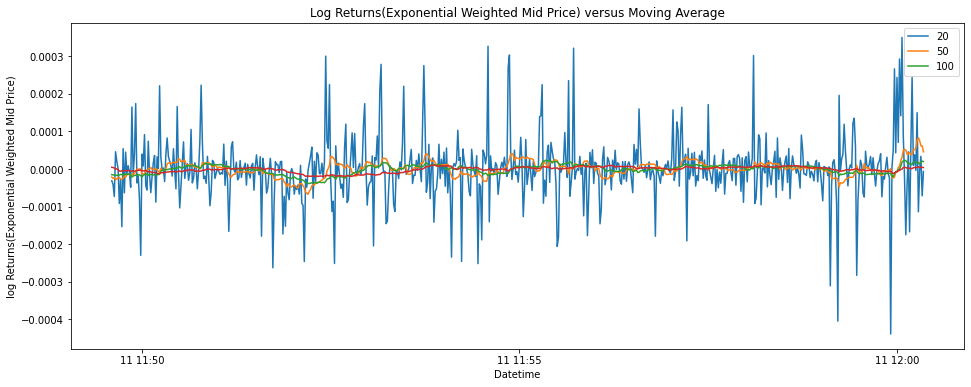

In [128]:
data = pd.read_parquet("dataset_log_returns(mid_price)_EWM5.pq")
data = data[:int(len(data)*(1/1000))]
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(data['log_returns(mid_price)_EWM5'])
ax.plot(data['log_returns(mid_price)_EWM5_20'])
ax.plot(data['log_returns(mid_price)_EWM5_50'])
ax.plot(data['log_returns(mid_price)_EWM5_100'])
ax.legend(['20', '50', '100'])
plt.title('Log Returns(Exponential Weighted Mid Price) versus Moving Average')
plt.xlabel('Datetime')
plt.ylabel('log Returns(Exponential Weighted Mid Price)')
plt.show()

- Liquidation analysis

In [223]:
data_liq['liquidation_size_binance'].pct_change().head(50)

timestamp
2021-12-11 07:46:03   NaN
2021-12-11 07:46:04   NaN
2021-12-11 07:46:05   NaN
2021-12-11 07:46:06   NaN
2021-12-11 07:46:07   NaN
2021-12-11 07:46:08   NaN
2021-12-11 07:46:09   NaN
2021-12-11 07:46:10   NaN
2021-12-11 07:46:11   NaN
2021-12-11 07:46:12   NaN
2021-12-11 07:46:13   NaN
2021-12-11 07:46:14   NaN
2021-12-11 07:46:15   NaN
2021-12-11 07:46:16   NaN
2021-12-11 07:46:17   NaN
2021-12-11 07:46:18   NaN
2021-12-11 07:46:19   NaN
2021-12-11 07:46:20   NaN
2021-12-11 07:46:21   NaN
2021-12-11 07:46:22   NaN
2021-12-11 07:46:23   NaN
2021-12-11 07:46:24   NaN
2021-12-11 07:46:25   NaN
2021-12-11 07:46:26   NaN
2021-12-11 07:46:27   NaN
2021-12-11 07:46:28   NaN
2021-12-11 07:46:29   NaN
2021-12-11 07:46:30   NaN
2021-12-11 07:46:32   NaN
2021-12-11 07:46:33   NaN
2021-12-11 07:46:34   NaN
2021-12-11 07:46:35   NaN
2021-12-11 07:46:36   NaN
2021-12-11 07:46:37   NaN
2021-12-11 07:46:38   NaN
2021-12-11 07:46:39   NaN
2021-12-11 07:46:40   NaN
2021-12-11 07:46:41   NaN
20

timestamp
2021-12-11 07:46:03                False
2021-12-11 07:46:04                False
2021-12-11 07:46:05                False
2021-12-11 07:46:06                False
2021-12-11 07:46:07                False
                                   ...  
2021-12-18 23:38:00                False
2021-12-18 23:38:01                False
2021-12-18 23:38:02                False
change_liquidation_size            False
change_liquidation_size_binance    False
Name: log_returns(mid_price), Length: 597687, dtype: bool

In [296]:
data = pd.read_parquet("dataset_log_returns(volWeighted_mid_price).pq")
data_liq = data[['log_returns(volWeighted_mid_price)', 'liquidation_size']]
data_liq['change_liquidation_size'] = data['liquidation_size'].pct_change()
data_liq['change_liquidation_size_binance'] = data['liquidation_size_binance'].pct_change()
data_liq.drop(columns='liquidation_size', inplace=True)
data_liq.fillna(0, inplace=True)
data_liq=data_liq[np.isfinite(data_liq).all(1)]

C:\Users\danie\AppData\Local\Temp\ipykernel_17992\2222437808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_liq['change_liquidation_size'] = data['liquidation_size'].pct_change()
C:\Users\danie\AppData\Local\Temp\ipykernel_17992\2222437808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_liq['change_liquidation_size_binance'] = data['liquidation_size_binance'].pct_change()
C:\Users\danie\AppData\Local\Temp\ipykernel_17992\2222437808.py:5: SettingWithCopyWarning: 
A value is trying to be se

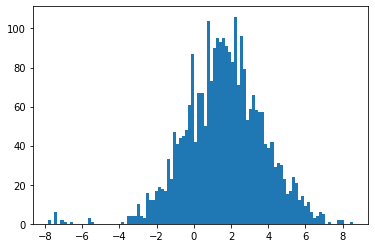

In [299]:
liq_bin = data_liq['change_liquidation_size_binance'][data_liq['change_liquidation_size_binance']>0]
plt.hist(np.log(liq_bin), bins=100)
plt.show()

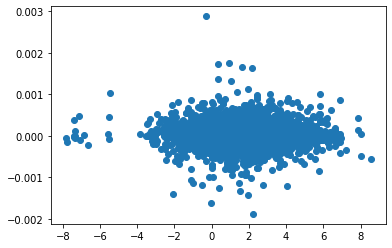

In [301]:
plt.scatter(np.log(liq_bin), data_liq['log_returns(volWeighted_mid_price)'][data_liq['change_liquidation_size_binance']>0])

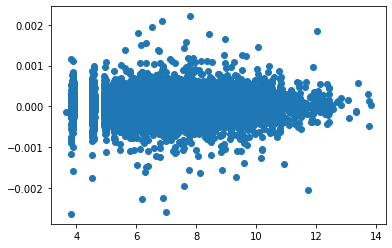

In [41]:
plt.scatter(np.log(data['liquidation_size_binance']), data['log_returns(mid_price)'])
plt.show()

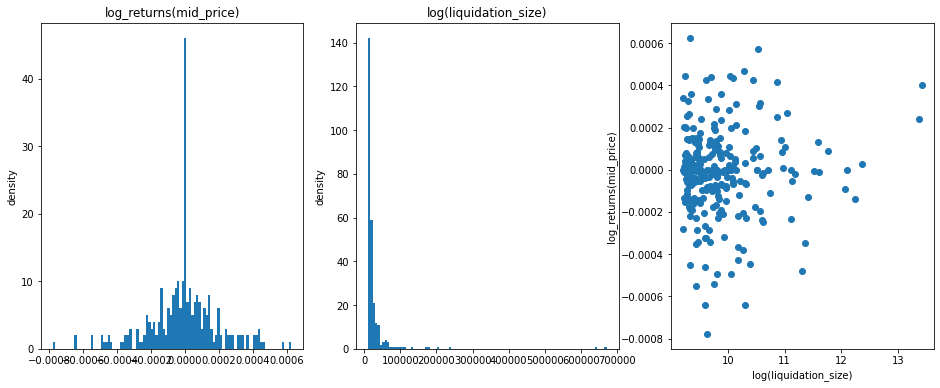

In [369]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
axs[0].hist(data['log_returns(mid_price)'].loc[data['liquidation_size']>10000], bins=100)
axs[0].title.set_text('log_returns(mid_price)')
axs[0].set_ylabel('density')
axs[1].hist(data['liquidation_size'].loc[data['liquidation_size']>10000], bins=100)
axs[1].title.set_text('log(liquidation_size)')
axs[1].set_ylabel('density')
axs[2].scatter(np.log(data['liquidation_size'].loc[data['liquidation_size']>10000]),
    data['log_returns(mid_price)'].loc[data['liquidation_size']>10000])
axs[2].set_xlabel('log(liquidation_size)')
axs[2].set_ylabel('log_returns(mid_price)')
plt.show()

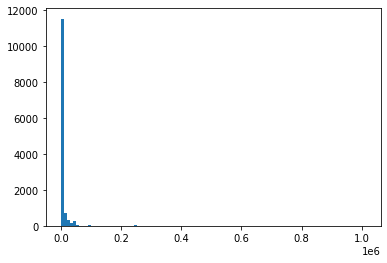

In [59]:
plt.hist(data['liquidation_size_binance'].loc[data['liquidation_size_binance']!=0], bins=100)
plt.show()

In [60]:
data['liquidation_size_binance'].loc[data['liquidation_size_binance']!=0].boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

In [76]:
data_liq = data[['log_returns(mid_price)','liquidation_size_binance']].loc[data['liquidation_size_binance']>100000]

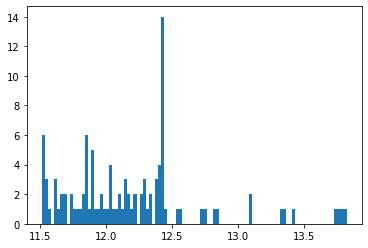

In [77]:
plt.hist(np.log(data_liq['liquidation_size_binance']), bins=100)
plt.show()

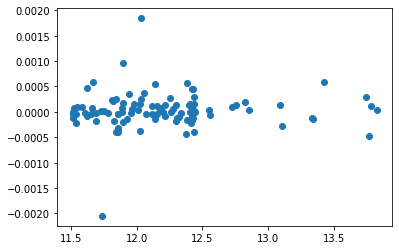

In [78]:
plt.scatter(np.log(data_liq['liquidation_size_binance']), data_liq['log_returns(mid_price)'])

In [79]:
data.columns

Index(['log_returns(mid_price)', 'class', 'log_returns(mid_price)_20',
       'log_returns(mid_price)_50', 'log_returns(mid_price)_100',
       'price_spread_ratio[0]', 'price_difference[0]', 'price_spread_ratio[1]',
       'price_difference[1]', 'price_spread_ratio[2]', 'price_difference[2]',
       'price_spread_ratio[3]', 'price_difference[3]', 'price_spread_ratio[4]',
       'price_difference[4]', 'average_price_ask', 'average_price_bid',
       'Vol_spread_ratio[0]', 'vol_imbalance[0]', 'vol_difference[0]',
       'Vol_spread_ratio[1]', 'vol_imbalance[1]', 'vol_difference[1]',
       'Vol_spread_ratio[2]', 'vol_imbalance[2]', 'vol_difference[2]',
       'Vol_spread_ratio[3]', 'vol_imbalance[3]', 'vol_difference[3]',
       'Vol_spread_ratio[4]', 'vol_imbalance[4]', 'vol_difference[4]',
       'accumulated_vol_difference', 'average_vol_ask', 'average_vol_bid',
       'realised_volatility', 'funding_rate', 'open_interest',
       'fundingRate_OI_ratio', 'total_average_trade_size', '

- Hour effect

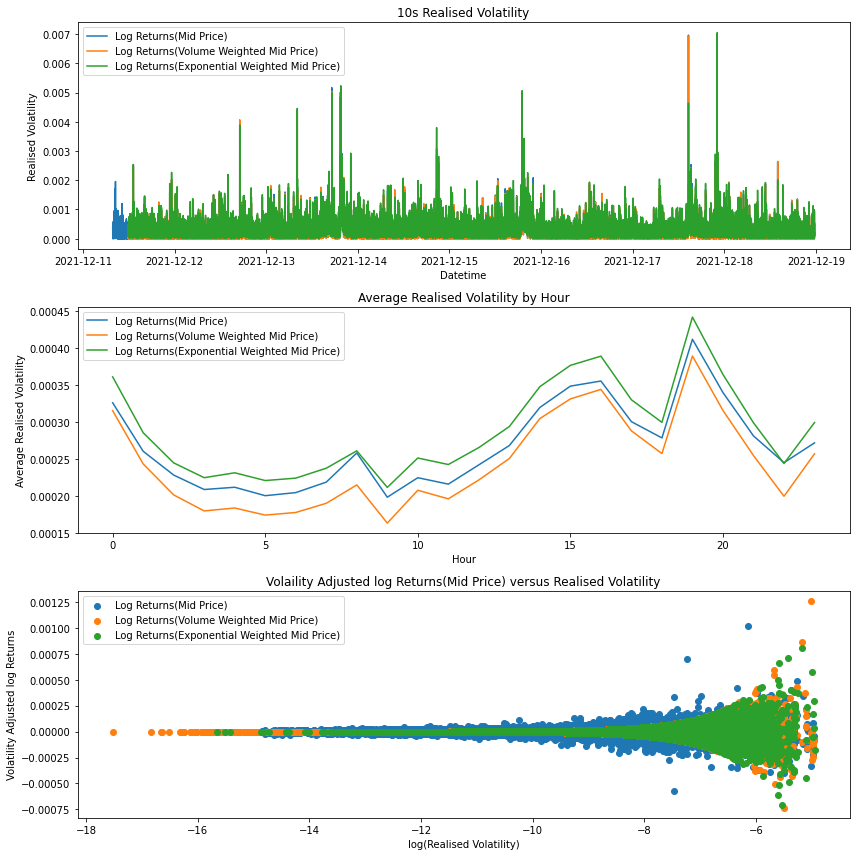

In [118]:
data = pd.read_parquet("dataset_log_returns(mid_price).pq")
data_vol = pd.read_parquet("dataset_log_returns(volWeighted_mid_price).pq")
data_EWM5 = pd.read_parquet("dataset_log_returns(mid_price)_EWM5.pq")

fig, axs = plt.subplots(3,1, figsize=(12, 12))
axs[0].plot(data['realised_volatility'])
axs[0].plot(data_vol['realised_volatility'])
axs[0].plot(data_EWM5['realised_volatility'])
axs[0].title.set_text('10s Realised Volatility')
axs[0].set_xlabel('Datetime')
axs[0].set_ylabel('Realised Volatility')
axs[0].legend(['Log Returns(Mid Price)', 'Log Returns(Volume Weighted Mid Price)', 'Log Returns(Exponential Weighted Mid Price)'])
axs[1].plot(data.groupby('hour').realised_volatility.mean())
axs[1].plot(data_vol.groupby('hour').realised_volatility.mean())
axs[1].plot(data_EWM5.groupby('hour').realised_volatility.mean())
axs[1].title.set_text('Average Realised Volatility by Hour')
axs[1].set_xlabel('Hour')
axs[1].set_ylabel('Average Realised Volatility')
axs[1].legend(['Log Returns(Mid Price)', 'Log Returns(Volume Weighted Mid Price)', 'Log Returns(Exponential Weighted Mid Price)'])
axs[2].scatter(np.log(data['realised_volatility']), data['log_returns(mid_price)']/np.log(data['realised_volatility']))
axs[2].scatter(np.log(data_vol['realised_volatility']), data_vol['log_returns(volWeighted_mid_price)']/np.log(data_vol['realised_volatility']))
axs[2].scatter(np.log(data_EWM5['realised_volatility']), data_EWM5['log_returns(mid_price)_EWM5']/np.log(data_EWM5['realised_volatility']))
axs[2].title.set_text('Volaility Adjusted log Returns(Mid Price) versus Realised Volatility')
axs[2].set_xlabel('log(Realised Volatility)')
axs[2].set_ylabel('Volatility Adjusted log Returns')
axs[2].legend(['Log Returns(Mid Price)', 'Log Returns(Volume Weighted Mid Price)', 'Log Returns(Exponential Weighted Mid Price)'])
fig.tight_layout()
plt.show()

- Binance

In [326]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

johansen = coint_johansen(data[['log_returns(mid_price)','log_returns(mid_price)_binance']], 0, 1)

In [331]:
johansen.trace_stat

array([560530.03781547, 192756.37877875])

In [330]:
johansen.trace_stat_crit_vals

array([[13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

In [325]:
data[['log_returns(mid_price)','log_returns(mid_price)_binance']]

,log_returns(mid_price),log_returns(mid_price)_binance
timestamp,,
2021-12-11 07:46:03,-0.000015,0.000000
2021-12-11 07:46:04,0.000035,0.000000
2021-12-11 07:46:05,0.000235,0.000000
2021-12-11 07:46:06,0.000037,0.000603
2021-12-11 07:46:07,0.000000,0.000229
...,...,...
2021-12-18 23:37:58,0.000000,0.000000
2021-12-18 23:37:59,0.000000,0.000000
2021-12-18 23:38:00,-0.000002,0.000000


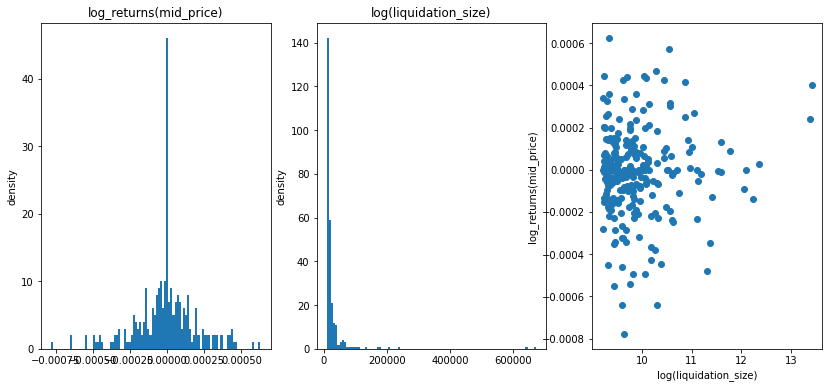

In [96]:
fig, axs = plt.subplots(1, 3, figsize=(14, 6))
axs[0].hist(data['log_returns(mid_price)'].loc[data['liquidation_size']>10000], bins=100)
axs[0].title.set_text('log_returns(mid_price)')
axs[0].set_ylabel('density')
axs[1].hist(data['liquidation_size'].loc[data['liquidation_size']>10000], bins=100)
axs[1].title.set_text('log(liquidation_size)')
axs[1].set_ylabel('density')
axs[2].scatter(np.log(data['liquidation_size'].loc[data['liquidation_size']>10000]),
    data['log_returns(mid_price)'].loc[data['liquidation_size']>10000])
axs[2].set_xlabel('log(liquidation_size)')
axs[2].set_ylabel('log_returns(mid_price)')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

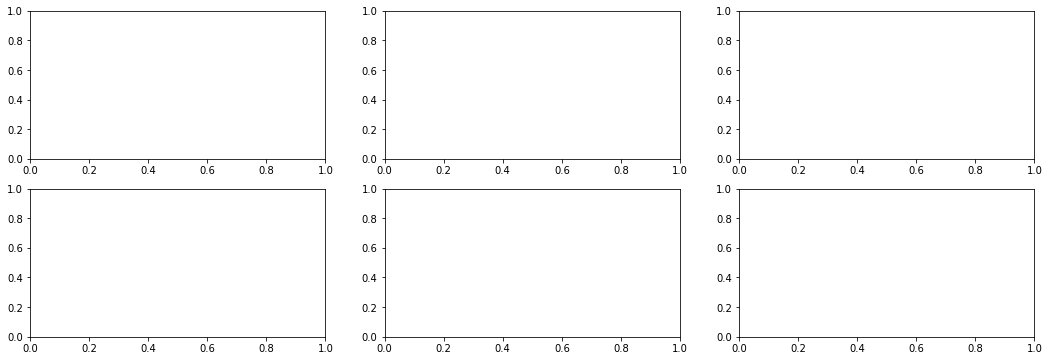

In [125]:
fig, axs = plt.subplots(2, 3, figsize=(18, 6))
axs[0].scatter(data['log_returns(mid_price)'], data['log_returns(mid_price)_binance'])
m0, b0 = np.polyfit(data['log_returns(mid_price)'], data['log_returns(mid_price)_binance'], 1)
axs[0].plot(data['log_returns(mid_price)'], m0*data['log_returns(mid_price)'] + b0)
axs[0].title.set_text('Log Returns(Mid-price) : FTX and Binance')
axs[0].set_xlabel('Log Returns(Mid-price) FTX')
axs[0].set_ylabel('Log Returns(Mid-price) Binance (1s Lag)')


axs[1].scatter(data_vol['log_returns(volWeighted_mid_price)'], data_vol['log_returns(volWeighted_mid_price)_binance'])
m1, b1 = np.polyfit(data_vol['log_returns(volWeighted_mid_price)'], data_vol['log_returns(volWeighted_mid_price)_binance'], 1)
axs[1].plot(data_vol['log_returns(volWeighted_mid_price)'], m1*data_vol['log_returns(volWeighted_mid_price)'] + b1)
axs[1].title.set_text('Log Returns(Volume Weighted Mid-price) : FTX and Binance')
axs[1].set_xlabel('Log Returns(Volume Weighted Mid-price) FTX')
axs[1].set_ylabel('Log Returns(Volume Weighted Mid-price) Binance (1s Lag)')

axs[2].scatter(data_ewm['log_returns(mid_price)_EWM5'], data_ewm['log_returns(mid_price)_EWM5_binance'])
m2, b2 = np.polyfit(data_ewm['log_returns(mid_price)_EWM5'], data_ewm['log_returns(mid_price)_EWM5_binance'], 1)
axs[2].plot(data_ewm['log_returns(mid_price)_EWM5'], m2*data_ewm['log_returns(mid_price)_EWM5'] + b2)
axs[2].title.set_text('Log Returns(Exponentially Weighted Mid-price) : FTX and Binance')
axs[2].set_xlabel('Log Returns(Exponentially Weighted Mid-price) FTX')
axs[2].set_ylabel('Log Returns(Exponentially Weighted Mid-price) Binance (1s Lag)')

axs[3].scatter(data['log_returns(mid_price)'], data['log_returns(mid_price)_binance'].shift(2))
m0, b0 = np.polyfit(data['log_returns(mid_price)'], data['log_returns(mid_price)_binance'].shift(2), 1)
axs[3].plot(data['log_returns(mid_price)'], m0*data['log_returns(mid_price)'] + b0)
axs[3].title.set_text('Log Returns(Mid-price) : FTX and Binance')
axs[3].set_xlabel('Log Returns(Mid-price) FTX')
axs[3].set_ylabel('Log Returns(Mid-price) Binance (3s Lag)')

axs[4].scatter(data_vol['log_returns(volWeighted_mid_price)'], data_vol['log_returns(volWeighted_mid_price)_binance'].shift(2))
m1, b1 = np.polyfit(data_vol['log_returns(volWeighted_mid_price)'], data_vol['log_returns(volWeighted_mid_price)_binance'].shift(2), 1)
axs[4].plot(data_vol['log_returns(volWeighted_mid_price)'], m1*data_vol['log_returns(volWeighted_mid_price)'] + b1)
axs[4].title.set_text('Log Returns(Volume Weighted Mid-price) : FTX and Binance')
axs[4].set_xlabel('Log Returns(Volume Weighted Mid-price) FTX')
axs[4].set_ylabel('Log Returns(Volume Weighted Mid-price) Binance (3s Lag)')

axs[5].scatter(data_ewm['log_returns(mid_price)_EWM5'], data_ewm['log_returns(mid_price)_EWM5_binance'].shift(2))
m2, b2 = np.polyfit(data_ewm['log_returns(mid_price)_EWM5'], data_ewm['log_returns(mid_price)_EWM5_binance'].shift(2), 1)
axs[5].plot(data_ewm['log_returns(mid_price)_EWM5'], m2*data_ewm['log_returns(mid_price)_EWM5'] + b2)
axs[5].title.set_text('Log Returns(Exponentially Weighted Mid-price) : FTX and Binance')
axs[5].set_xlabel('Log Returns(Exponentially Weighted Mid-price) FTX')
axs[5].set_ylabel('Log Returns(Exponentially Weighted Mid-price) Binance (3s Lag)')

fig.tight_layout()
plt.show()

- Volume imbalance

<AxesSubplot:xlabel='timestamp'>

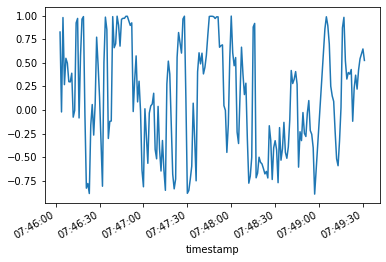

In [345]:
path = r"C:\Users\danie\Desktop\master_project-env\datasets_combined\Downsampled"
ftx_trade = pd.read_parquet(path + '\\ftx_trades_downsampled.parquet.gz')
data = pd.read_parquet("dataset_log_returns(mid_price).pq")
data[:200]['vol_imbalance[0]'].plot()

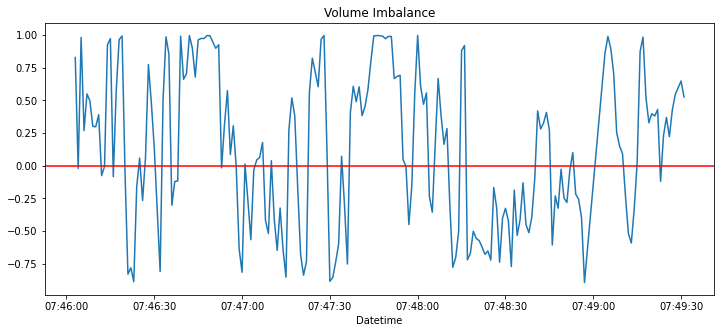

In [117]:
plt.figure(figsize=(12,5))
plt.plot(data[:200]['vol_imbalance[0]'])
plt.title('Volume Imbalance')
plt.xlabel('Datetime')
plt.axhline(y=0.0, color='r', linestyle='-')


In [364]:
data.columns

Index(['log_returns(mid_price)', 'class', 'log_returns(mid_price)_20',
       'log_returns(mid_price)_50', 'log_returns(mid_price)_100',
       'price_spread_ratio[0]', 'price_difference[0]', 'price_spread_ratio[1]',
       'price_difference[1]', 'price_spread_ratio[2]', 'price_difference[2]',
       'price_spread_ratio[3]', 'price_difference[3]', 'price_spread_ratio[4]',
       'price_difference[4]', 'average_price_ask', 'average_price_bid',
       'Vol_spread_ratio[0]', 'vol_imbalance[0]', 'vol_difference[0]',
       'Vol_spread_ratio[1]', 'vol_imbalance[1]', 'vol_difference[1]',
       'Vol_spread_ratio[2]', 'vol_imbalance[2]', 'vol_difference[2]',
       'Vol_spread_ratio[3]', 'vol_imbalance[3]', 'vol_difference[3]',
       'Vol_spread_ratio[4]', 'vol_imbalance[4]', 'vol_difference[4]',
       'accumulated_vol_difference', 'average_vol_ask', 'average_vol_bid',
       'realised_volatility', 'funding_rate', 'open_interest',
       'fundingRate_OI_ratio', 'total_average_trade_size', '

- Funding Rate

In [366]:
data = pd.read_parquet("dataset_log_returns(mid_price).pq")


timestamp
2021-12-11 07:46:03    0.000018
2021-12-11 07:46:04    0.000018
2021-12-11 07:46:05    0.000018
2021-12-11 07:46:06    0.000018
2021-12-11 07:46:07    0.000018
                         ...   
2021-12-18 23:37:58    0.000005
2021-12-18 23:37:59    0.000005
2021-12-18 23:38:00    0.000005
2021-12-18 23:38:01    0.000005
2021-12-18 23:38:02    0.000005
Name: funding_rate, Length: 597685, dtype: float64

<AxesSubplot:xlabel='timestamp'>

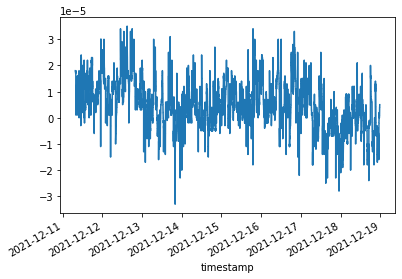

In [368]:
np.corr(data['funding_rate'].plot(), 